 Author:Renaldo Sauveur
 
 Date:09/30/2024

***Introduction***

The following aims to perform multiple linear regression to model the relationship between air temperature and other selected variables.

Data from a meteorological station in Jacmel in Haiti is considered to model the relationship between air temperature and other meteorological variables.

Features in the dataset are:

- Datetime

- Air Temperature

- Air Pressure

- Relative Humidity

- Wind Direction

- Wind Speed

- Rain

- Hail

- Samples/Hour

Python module scikit-learn for machine learning will be used.

In [1]:
# Imports
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions 
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [2]:
MetJacmel= pd.read_csv("JME2_MET_Jacmel.csv", sep=None , engine='python',skiprows=1)


***Exploratory data analysis***



In [3]:
MetJacmel

DateTime   Air Pressure   Air Temperature  \
0      2022-06-08T17:00:00Z      1014.1000           29.6636   
1      2022-06-08T18:00:00Z      1013.8778           29.5556   
2      2022-06-08T19:00:00Z      1013.4167           29.6500   
3      2022-06-08T20:00:00Z      1012.8750           29.1167   
4      2022-06-08T21:00:00Z      1012.5666           28.6833   
...                     ...            ...               ...   
16419  2024-04-29T20:00:00Z      1011.1834           29.2500   
16420  2024-04-29T21:00:00Z      1011.1083           28.7583   
16421  2024-04-29T22:00:00Z      1011.4583           28.1750   
16422  2024-04-29T23:00:00Z      1011.8583           27.7917   
16423  2024-04-30T00:00:00Z      1012.1000           27.1917   

        Relative Humidity   Wind Direction   Wind Speed   Rain   Hail  \
0                 58.5364         101.8357       1.5909    0.0    0.0   
1                 59.1889         115.5107       1.5000    0.0    0.0   
2                 58.4583         144.0778       1.2500    0.0    0.0   
3                 58.5750         141.8065       1.1083    0.0    0.0   
4                 58.9750          88.4648       0.8917    0.0    0.0   
...                   ...              ...          ...    ...    ...   
16419             56.5333         101.2265       1.1417    0.0    0.0   
16420             56.6833         118.5462       1.3500    0.0    0.0   
16421             58.9833         137.8124       0.8167    0.0    0.0   
16422             63.5417         247.4314       0.6250    0.0    0.0   
16423             65.9500         290.2557       0.4083    0.0    0.0   

        Samples/hour  
0                 11  
1                  9  
2                 12  
3                 12  
4                 12  
...              ...  
16419             12  
16420             12  
16421             12  
16422             12  
16423             12  

[16424 rows x 9 columns]

In [4]:
MetJacmel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16424 entries, 0 to 16423
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DateTime            16424 non-null  object 
 1    Air Pressure       16424 non-null  float64
 2    Air Temperature    16424 non-null  float64
 3    Relative Humidity  16424 non-null  float64
 4    Wind Direction     16424 non-null  float64
 5    Wind Speed         16424 non-null  float64
 6    Rain               16424 non-null  float64
 7    Hail               16424 non-null  float64
 8    Samples/hour       16424 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 1.1+ MB


In [5]:
MetJacmel.shape

(16424, 9)

Dealing with missing values

In [6]:
MetJacmel.isna().sum()

DateTime              0
 Air Pressure         0
 Air Temperature      0
 Relative Humidity    0
 Wind Direction       0
 Wind Speed           0
 Rain                 0
 Hail                 0
 Samples/hour         0
dtype: int64

In [7]:
MetJacmel.dropna()

DateTime   Air Pressure   Air Temperature  \
0      2022-06-08T17:00:00Z      1014.1000           29.6636   
1      2022-06-08T18:00:00Z      1013.8778           29.5556   
2      2022-06-08T19:00:00Z      1013.4167           29.6500   
3      2022-06-08T20:00:00Z      1012.8750           29.1167   
4      2022-06-08T21:00:00Z      1012.5666           28.6833   
...                     ...            ...               ...   
16419  2024-04-29T20:00:00Z      1011.1834           29.2500   
16420  2024-04-29T21:00:00Z      1011.1083           28.7583   
16421  2024-04-29T22:00:00Z      1011.4583           28.1750   
16422  2024-04-29T23:00:00Z      1011.8583           27.7917   
16423  2024-04-30T00:00:00Z      1012.1000           27.1917   

        Relative Humidity   Wind Direction   Wind Speed   Rain   Hail  \
0                 58.5364         101.8357       1.5909    0.0    0.0   
1                 59.1889         115.5107       1.5000    0.0    0.0   
2                 58.4583         144.0778       1.2500    0.0    0.0   
3                 58.5750         141.8065       1.1083    0.0    0.0   
4                 58.9750          88.4648       0.8917    0.0    0.0   
...                   ...              ...          ...    ...    ...   
16419             56.5333         101.2265       1.1417    0.0    0.0   
16420             56.6833         118.5462       1.3500    0.0    0.0   
16421             58.9833         137.8124       0.8167    0.0    0.0   
16422             63.5417         247.4314       0.6250    0.0    0.0   
16423             65.9500         290.2557       0.4083    0.0    0.0   

        Samples/hour  
0                 11  
1                  9  
2                 12  
3                 12  
4                 12  
...              ...  
16419             12  
16420             12  
16421             12  
16422             12  
16423             12  

[16424 rows x 9 columns]

Dealing with duplicates values

In [8]:
MetJacmel.drop_duplicates()

DateTime   Air Pressure   Air Temperature  \
0      2022-06-08T17:00:00Z      1014.1000           29.6636   
1      2022-06-08T18:00:00Z      1013.8778           29.5556   
2      2022-06-08T19:00:00Z      1013.4167           29.6500   
3      2022-06-08T20:00:00Z      1012.8750           29.1167   
4      2022-06-08T21:00:00Z      1012.5666           28.6833   
...                     ...            ...               ...   
16419  2024-04-29T20:00:00Z      1011.1834           29.2500   
16420  2024-04-29T21:00:00Z      1011.1083           28.7583   
16421  2024-04-29T22:00:00Z      1011.4583           28.1750   
16422  2024-04-29T23:00:00Z      1011.8583           27.7917   
16423  2024-04-30T00:00:00Z      1012.1000           27.1917   

        Relative Humidity   Wind Direction   Wind Speed   Rain   Hail  \
0                 58.5364         101.8357       1.5909    0.0    0.0   
1                 59.1889         115.5107       1.5000    0.0    0.0   
2                 58.4583         144.0778       1.2500    0.0    0.0   
3                 58.5750         141.8065       1.1083    0.0    0.0   
4                 58.9750          88.4648       0.8917    0.0    0.0   
...                   ...              ...          ...    ...    ...   
16419             56.5333         101.2265       1.1417    0.0    0.0   
16420             56.6833         118.5462       1.3500    0.0    0.0   
16421             58.9833         137.8124       0.8167    0.0    0.0   
16422             63.5417         247.4314       0.6250    0.0    0.0   
16423             65.9500         290.2557       0.4083    0.0    0.0   

        Samples/hour  
0                 11  
1                  9  
2                 12  
3                 12  
4                 12  
...              ...  
16419             12  
16420             12  
16421             12  
16422             12  
16423             12  

[16424 rows x 9 columns]

In [9]:
MetJacmel.describe()

Air Pressure   Air Temperature   Relative Humidity   Wind Direction  \
count   16424.000000      16424.000000        16424.000000     16424.000000   
mean     1012.538846         26.358072           66.831630       235.410322   
std         2.323258          2.697380            9.621709       102.920445   
min      1003.008400         18.908300           33.041700         0.051500   
25%      1011.131300         24.275000           59.258300       124.501300   
50%      1012.725000         26.383300           67.066700       310.007500   
75%      1014.116600         28.466700           74.760400       327.826025   
max      1020.025000         33.558300           88.316700       359.980800   

         Wind Speed          Rain     Hail   Samples/hour  
count  16424.000000  16424.000000  16424.0   16424.000000  
mean       1.233440      1.568028      0.0      11.997504  
std        0.422327     15.464352      0.0       0.068427  
min        0.166700      0.000000      0.0       9.000000  
25%        0.941700      0.000000      0.0      12.000000  
50%        1.216700      0.000000      0.0      12.000000  
75%        1.483300      0.000000      0.0      12.000000  
max        5.000000    611.900000      0.0      12.000000

In [10]:
MetJacmel.columns

Index(['DateTime', ' Air Pressure', ' Air Temperature', ' Relative Humidity',
       ' Wind Direction', ' Wind Speed', ' Rain', ' Hail', ' Samples/hour'],
      dtype='object')

We will omit the following variables for our analysis : Rain, Hail and Samples/hour

In [11]:
# We drop the variables Rain, Hail and Samples/hour 
meteo_jacmel = MetJacmel.drop([' Rain', ' Hail', ' Samples/hour'], axis=1)

In [12]:
meteo_jacmel

DateTime   Air Pressure   Air Temperature  \
0      2022-06-08T17:00:00Z      1014.1000           29.6636   
1      2022-06-08T18:00:00Z      1013.8778           29.5556   
2      2022-06-08T19:00:00Z      1013.4167           29.6500   
3      2022-06-08T20:00:00Z      1012.8750           29.1167   
4      2022-06-08T21:00:00Z      1012.5666           28.6833   
...                     ...            ...               ...   
16419  2024-04-29T20:00:00Z      1011.1834           29.2500   
16420  2024-04-29T21:00:00Z      1011.1083           28.7583   
16421  2024-04-29T22:00:00Z      1011.4583           28.1750   
16422  2024-04-29T23:00:00Z      1011.8583           27.7917   
16423  2024-04-30T00:00:00Z      1012.1000           27.1917   

        Relative Humidity   Wind Direction   Wind Speed  
0                 58.5364         101.8357       1.5909  
1                 59.1889         115.5107       1.5000  
2                 58.4583         144.0778       1.2500  
3                 58.5750         141.8065       1.1083  
4                 58.9750          88.4648       0.8917  
...                   ...              ...          ...  
16419             56.5333         101.2265       1.1417  
16420             56.6833         118.5462       1.3500  
16421             58.9833         137.8124       0.8167  
16422             63.5417         247.4314       0.6250  
16423             65.9500         290.2557       0.4083  

[16424 rows x 6 columns]

In [13]:
# We made column name correction
meteo_jacmel.rename(columns={' Air Pressure':'Air_pressure', ' Air Temperature':'Air_Temperature', ' Relative Humidity':'Relative_Humidity', ' Wind Direction':'Wind_Direction', ' Wind Speed':'Wind_Speed'},inplace=True)

In [14]:
meteo_jacmel

DateTime  Air_pressure  Air_Temperature  Relative_Humidity  \
0      2022-06-08T17:00:00Z     1014.1000          29.6636            58.5364   
1      2022-06-08T18:00:00Z     1013.8778          29.5556            59.1889   
2      2022-06-08T19:00:00Z     1013.4167          29.6500            58.4583   
3      2022-06-08T20:00:00Z     1012.8750          29.1167            58.5750   
4      2022-06-08T21:00:00Z     1012.5666          28.6833            58.9750   
...                     ...           ...              ...                ...   
16419  2024-04-29T20:00:00Z     1011.1834          29.2500            56.5333   
16420  2024-04-29T21:00:00Z     1011.1083          28.7583            56.6833   
16421  2024-04-29T22:00:00Z     1011.4583          28.1750            58.9833   
16422  2024-04-29T23:00:00Z     1011.8583          27.7917            63.5417   
16423  2024-04-30T00:00:00Z     1012.1000          27.1917            65.9500   

       Wind_Direction  Wind_Speed  
0            101.8357      1.5909  
1            115.5107      1.5000  
2            144.0778      1.2500  
3            141.8065      1.1083  
4             88.4648      0.8917  
...               ...         ...  
16419        101.2265      1.1417  
16420        118.5462      1.3500  
16421        137.8124      0.8167  
16422        247.4314      0.6250  
16423        290.2557      0.4083  

[16424 rows x 6 columns]

In [15]:
# We change the DateTime object column format in datetime format
meteo_jacmel['DateTime'] = pd.to_datetime(MetJacmel['DateTime'])

In [16]:
meteo_jacmel

DateTime  Air_pressure  Air_Temperature  \
0     2022-06-08 17:00:00+00:00     1014.1000          29.6636   
1     2022-06-08 18:00:00+00:00     1013.8778          29.5556   
2     2022-06-08 19:00:00+00:00     1013.4167          29.6500   
3     2022-06-08 20:00:00+00:00     1012.8750          29.1167   
4     2022-06-08 21:00:00+00:00     1012.5666          28.6833   
...                         ...           ...              ...   
16419 2024-04-29 20:00:00+00:00     1011.1834          29.2500   
16420 2024-04-29 21:00:00+00:00     1011.1083          28.7583   
16421 2024-04-29 22:00:00+00:00     1011.4583          28.1750   
16422 2024-04-29 23:00:00+00:00     1011.8583          27.7917   
16423 2024-04-30 00:00:00+00:00     1012.1000          27.1917   

       Relative_Humidity  Wind_Direction  Wind_Speed  
0                58.5364        101.8357      1.5909  
1                59.1889        115.5107      1.5000  
2                58.4583        144.0778      1.2500  
3                58.5750        141.8065      1.1083  
4                58.9750         88.4648      0.8917  
...                  ...             ...         ...  
16419            56.5333        101.2265      1.1417  
16420            56.6833        118.5462      1.3500  
16421            58.9833        137.8124      0.8167  
16422            63.5417        247.4314      0.6250  
16423            65.9500        290.2557      0.4083  

[16424 rows x 6 columns]

In [17]:
meteo_jacmel['Air_pressure']

0        1014.1000
1        1013.8778
2        1013.4167
3        1012.8750
4        1012.5666
           ...    
16419    1011.1834
16420    1011.1083
16421    1011.4583
16422    1011.8583
16423    1012.1000
Name: Air_pressure, Length: 16424, dtype: float64

Dealing with outliers



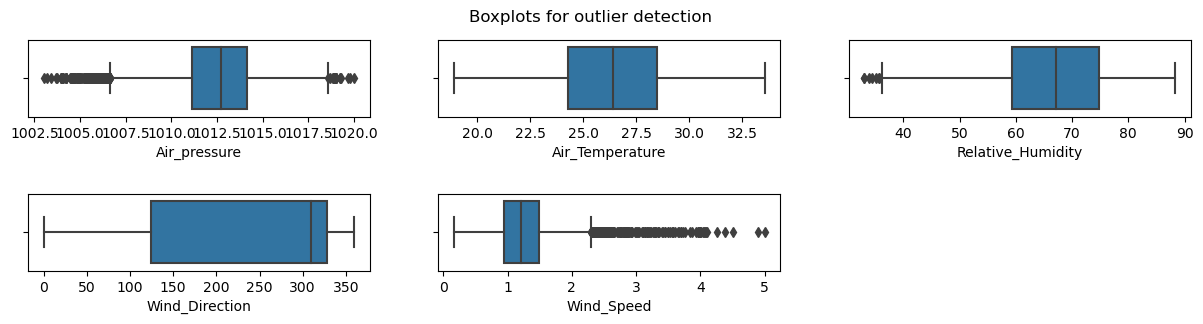

In [18]:
# We visualize each numeric variable in the dataset using a boxplot to detect the outliers.
#The outliers are the dots on the boxplots.

fig, axes = plt.subplots(2, 3, figsize=(15, 3))
fig.delaxes(axes[1][2])
plt.subplots_adjust(hspace=1)
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0,0], x=meteo_jacmel['Air_pressure'])
sns.boxplot(ax=axes[0,1], x=meteo_jacmel['Air_Temperature'])
sns.boxplot(ax=axes[0,2], x=meteo_jacmel['Relative_Humidity'])
sns.boxplot(ax=axes[1,0], x=meteo_jacmel['Wind_Direction'])
sns.boxplot(ax=axes[1,1], x=meteo_jacmel['Wind_Speed'])
plt.show();




<AxesSubplot: xlabel='Air_pressure', ylabel='Count'>

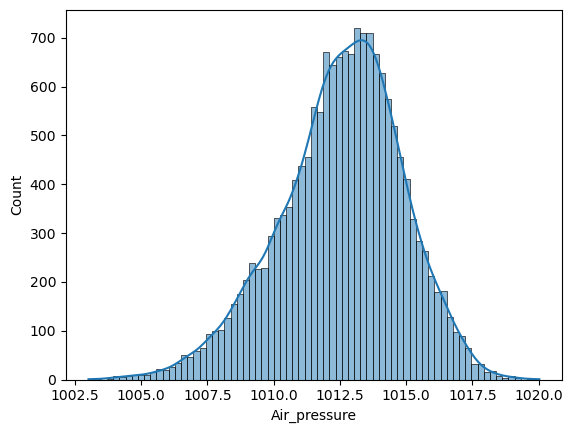

In [19]:
sns.histplot(meteo_jacmel['Air_pressure'], kde = True)

<AxesSubplot: xlabel='Air_Temperature', ylabel='Count'>

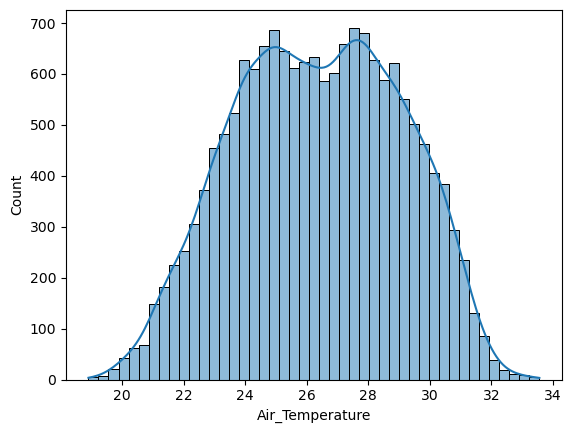

In [20]:
sns.histplot(meteo_jacmel['Air_Temperature'], kde = True)

<AxesSubplot: xlabel='Relative_Humidity', ylabel='Count'>

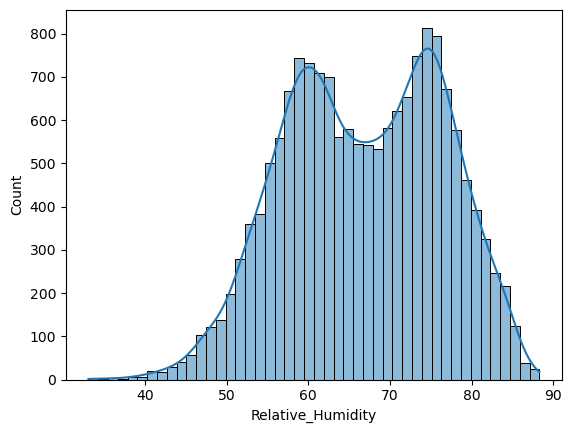

In [21]:
sns.histplot(meteo_jacmel['Relative_Humidity'], kde = True)

<AxesSubplot: xlabel='Wind_Direction', ylabel='Count'>

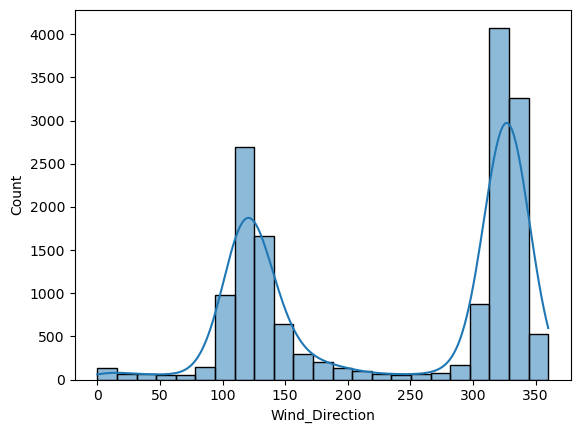

In [22]:
sns.histplot(meteo_jacmel['Wind_Direction'], kde = True)

<AxesSubplot: xlabel='Wind_Speed', ylabel='Count'>

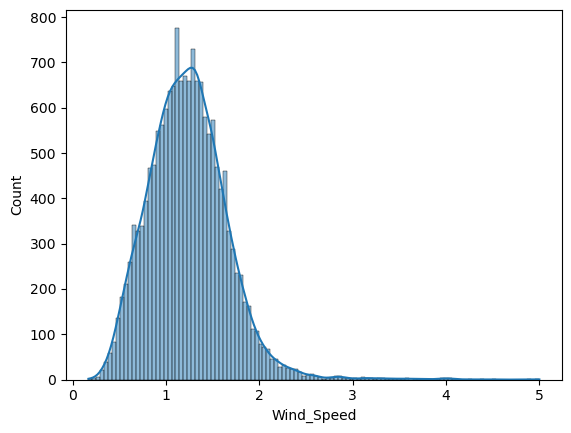

In [23]:
sns.histplot(meteo_jacmel['Wind_Speed'], kde = True)

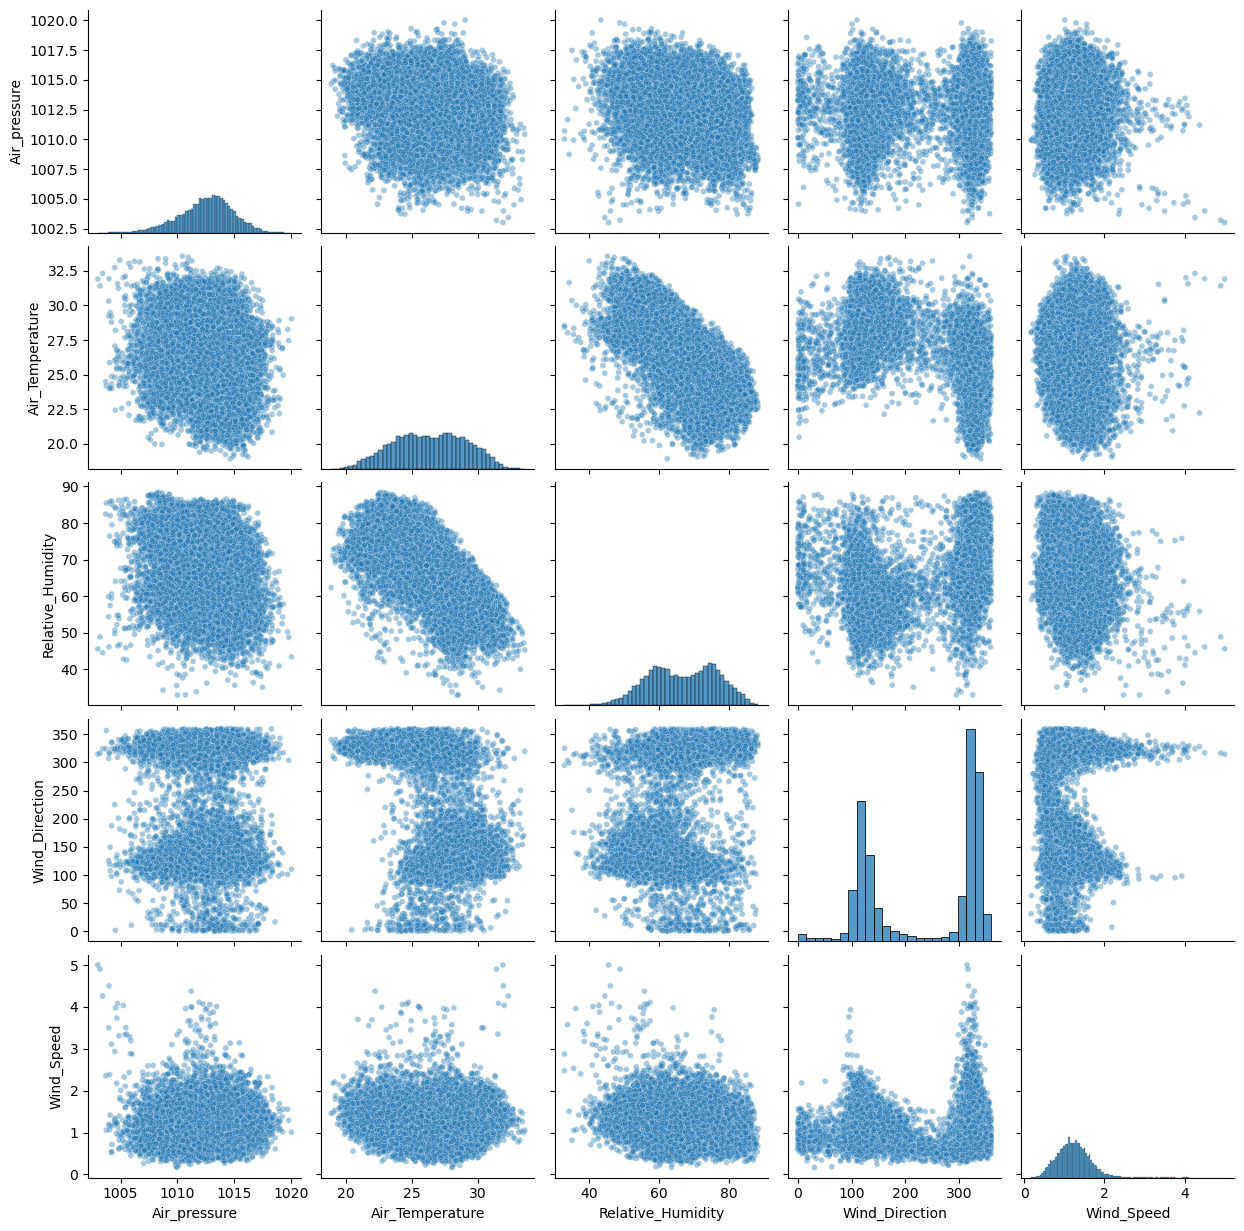

In [24]:
# We create a pairplot to visualize pairwise relationships between variables in the data

sns.pairplot(meteo_jacmel[['Air_pressure', 'Air_Temperature', 'Relative_Humidity', 'Wind_Direction', 'Wind_Speed']],    
             plot_kws={'alpha':0.4, 'size':5},   
            );

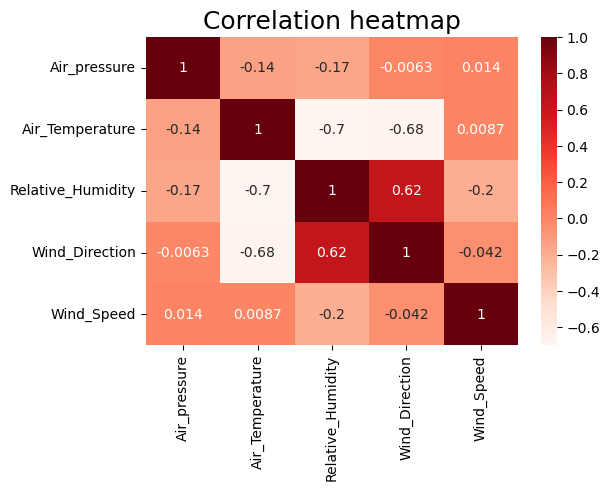

In [25]:
# We create correlation heatmap of the data

plt.figure(figsize=(6,4))
sns.heatmap(meteo_jacmel[['Air_pressure', 'Air_Temperature', 'Relative_Humidity', 'Wind_Direction', 'Wind_Speed']].corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

 =============================================================
 =============================================================

***Simple Linear Regression of Air Temperature versus Air Pressure***

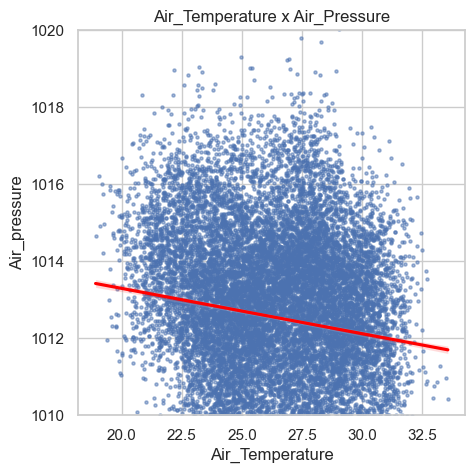

In [26]:
# Scatter plot of dependent and independent variables, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=meteo_jacmel['Air_Temperature'], y=meteo_jacmel['Air_pressure'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(1010, 1020)
plt.title('Air_Temperature x Air_Pressure')
plt.show()

In [27]:
# correlation between Air temperature and Air pressure
print(meteo_jacmel['Air_Temperature'].corr(meteo_jacmel['Air_pressure']))

-0.13658081785296203


In [28]:
# X is the feature variable and y is the target variable

X = meteo_jacmel[['Air_pressure']]
y = meteo_jacmel[['Air_Temperature']]

In [29]:
# Splitting of training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

***Scale the data***

We need to scale the values in the variables so that a big number does not significantly affect the model just because of its value. 

We use StandardScaler from sklearn for this process, where we apply the following function to each value.

z=(x−μ)/s

where :
- x  is the initial value,  
- μ  is mean of the samples,  
- s  is standard deviation of the samples, and  
- z  is the standardized value.

In [30]:
# Standardization of the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[ 1.02232082]
 [ 0.11512034]
 [ 0.34459908]
 ...
 [ 0.86457302]
 [ 0.19042276]
 [-1.6527222 ]]


In [31]:
# Model fitting to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [32]:
# Evaluation of the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.01788177203883834
R^2: 0.01788177203883834
MAE: 2.2589874480821885
MSE: 7.122698062069097
RMSE: 2.668838335693846


In [33]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [34]:
# Evaluation of the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.021486972855631392
R^2: 0.021486972855631392
MAE: 2.2719007676912755
MSE: 7.208245731843593
RMSE: 2.6848176347460906


Coefficient of determination suggests that only 2% of the dependent variable is predicted by the independent variable, which is a very poor prediction.

Which means that we cannot use the air pressure variable to predict the air temperature.

In [35]:
# Results dataframe
results = pd.DataFrame(data={'actual': y_test['Air_Temperature'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

actual  predicted  residual
13159  25.4083  26.671112 -1.262812
11823  26.1833  27.071432 -0.888132
7079   28.3833  25.835635  2.547665
15954  23.9000  26.357335 -2.457335
2509   23.8667  27.165709 -3.299009

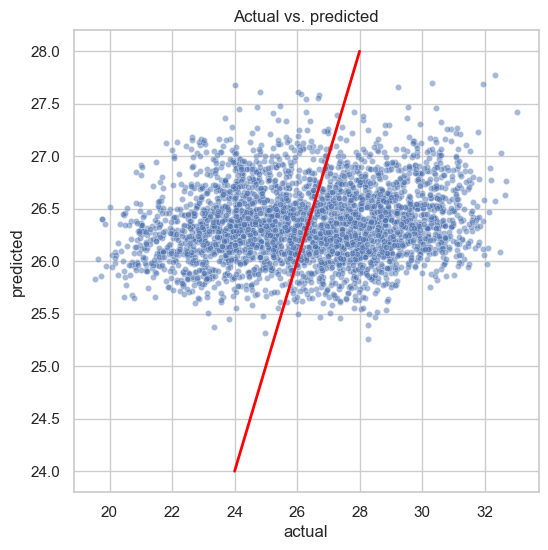

In [36]:
# Scatterplot to visualize predicted over actual
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([24,28], [24,28], c='red', linewidth=2)
plt.title('Actual vs. predicted');

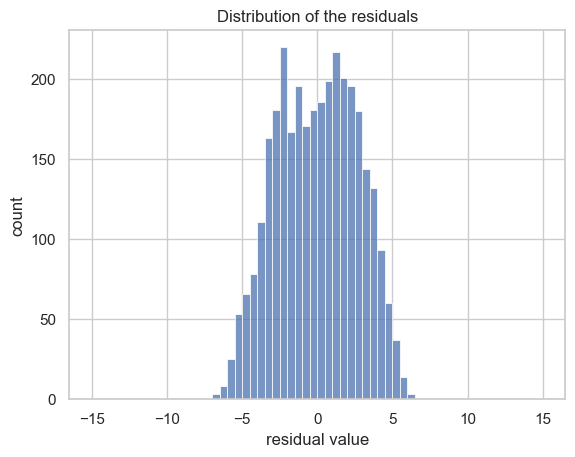

In [37]:
# Visualize the distribution of the residuals
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

The residual graph shows the distribution of differences between targets and predictions. 
This moderate normally distributed graph validates the heteroscedasticity requisite to perform the linear regression.

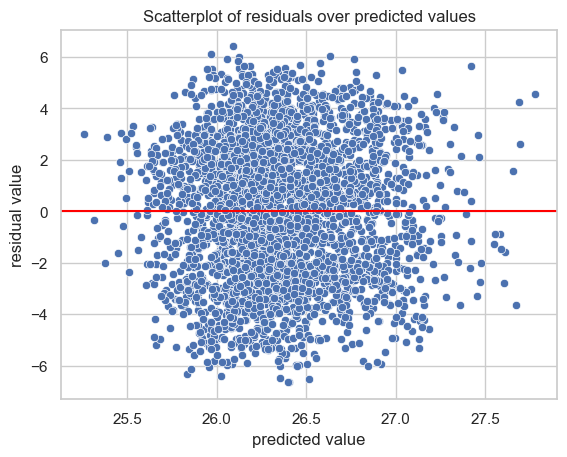

In [38]:
# Scatterplot of residuals over predicted

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

The variance where there are fitted values is similarly distributed, validating that the constant variance assumption.

In [39]:
# Get model coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients.Air_pressure[0]

-0.36011868743727543

In [40]:
# 1. Calculate SD of mean_distance in X_train data
print(X_train['Air_pressure'].std())

# 2. Divide the model coefficient by the standard deviation
print(coefficients.Air_pressure[0] / X_train['Air_pressure'].std())

2.324051063844902
-0.15495300126559883


In [41]:
coefficients.Air_pressure[0]

-0.36011868743727543

 =============================================================
 =============================================================

***Simple Linear Regression of Air Temperature versus Relative Humidity***

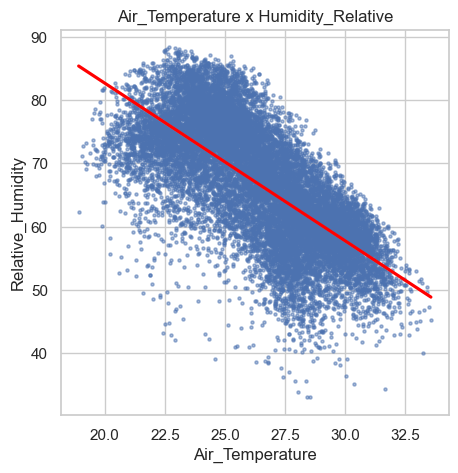

In [42]:
# Create a scatter plot of pression_jacmel and pression_testo, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=meteo_jacmel['Air_Temperature'], y=meteo_jacmel['Relative_Humidity'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.title('Air_Temperature x Humidity_Relative')
plt.show()

The linearity assumption holds for Air temperature, as there is a clear linear relationship in the scatterplot between Air temperature and Relative humidity. 

In [43]:
# correlation between column 1 and column2
print(meteo_jacmel['Air_Temperature'].corr(meteo_jacmel['Relative_Humidity']))

-0.6983458195857892


In [44]:
X = meteo_jacmel[['Relative_Humidity']]
y = meteo_jacmel[['Air_Temperature']]

In [45]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[ 0.05752246]
 [-0.09058875]
 [-1.94587653]
 ...
 [-0.52452861]
 [-0.81987795]
 [-0.61373833]]


In [47]:
# Fit your model to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [48]:
# Evaluation of the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.4830336607025999
R^2: 0.4830336607025999
MAE: 1.5526580454811671
MSE: 3.749238165259021
RMSE: 1.936294958227961


In [49]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [50]:
# Evaluation of the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.5058399844131278
R^2: 0.5058399844131278
MAE: 1.5203872942515195
MSE: 3.6402446614298345
RMSE: 1.9079425204732543


Coefficient of determination suggests that 50% of the Air Temperature is predicted by the Relative humidity.

The relative humidity is a better independent variable to predict the air temperature than the air pressure.

In [51]:
# Results dataframe
results = pd.DataFrame(data={'actual': y_test['Air_Temperature'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

actual  predicted  residual
13159  25.4083  26.327252 -0.918952
11823  26.1833  26.434248 -0.250948
7079   28.3833  29.089677 -0.706377
15954  23.9000  23.499988  0.400012
2509   23.8667  23.112529  0.754171

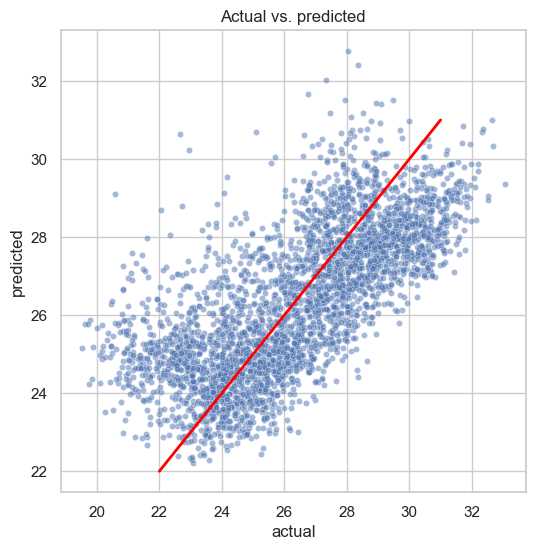

In [52]:
# Scatterplot to visualize predicted over actual
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([22,31], [22,31], c='red', linewidth=2)
plt.title('Actual vs. predicted');

A perfect fit model generates predictions that have exact value to the actuals.The actual-predicted plot from this model will lie on the 45-degree line.

The plot of our model follows the trend of a 45-degree line. However, our model is not optimal; many points are far from that 45-degree line.

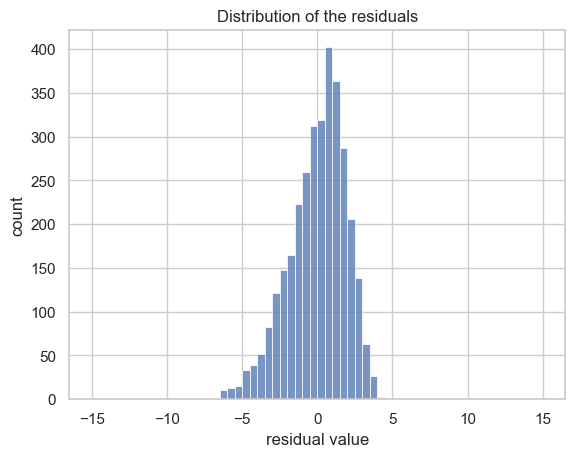

In [53]:
# Visualize the distribution of the residuals
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

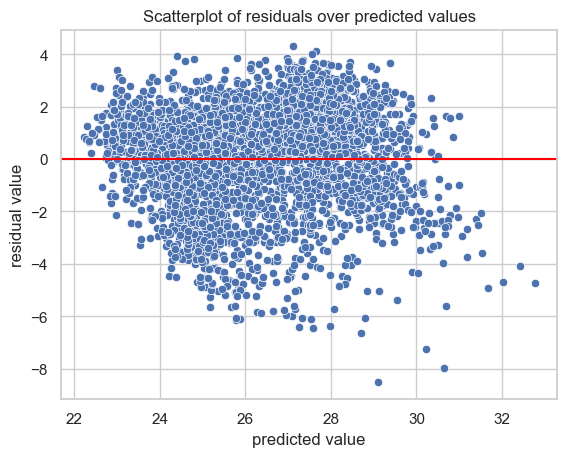

In [54]:
# Create a scatterplot of residuals over predicted

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

In [55]:
# Get model coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients.Relative_Humidity[0]

-1.8716691389910836

In [56]:
# 1. Calculate SD of mean_distance in X_train data
print(X_train['Relative_Humidity'].std())

# 2. Divide the model coefficient by the standard deviation
print(coefficients.Relative_Humidity[0] / X_train['Relative_Humidity'].std())

9.621515078700787
-0.19452956459366885


In [57]:
coefficients.Relative_Humidity[0]

-1.8716691389910836

 =============================================================
 =============================================================

***MULTILINEAR REGRESSION***

In [58]:
X = meteo_jacmel[['Air_pressure', 'Relative_Humidity', 'Wind_Direction', 'Wind_Speed']]
y = meteo_jacmel[['Air_Temperature']]

In [59]:
# Splitting of training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
# Standardization of the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[ 1.02232082  0.05752246  0.89276278 -0.41647338]
 [ 0.11512034 -0.09058875  0.77270633 -0.61434819]
 [ 0.34459908 -1.94587653 -1.14250956  0.23677479]
 ...
 [ 0.86457302 -0.52452861 -1.10351792  0.11800239]
 [ 0.19042276 -0.81987795 -1.19813494  1.8204859 ]
 [-1.6527222  -0.61373833  0.03600866 -0.91127918]]


In [61]:
# Model fitting to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [62]:
# Evaluation of the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.6464745230038347
R^2: 0.6464745230038347
MAE: 1.2876925340938996
MSE: 2.563902347195024
RMSE: 1.6012190191210645


In [63]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [64]:
# Evaluation of the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.6567569441431416
R^2: 0.6567569441431416
MAE: 1.2742867772995412
MSE: 2.528510325085446
RMSE: 1.5901290278104623


Coefficient of determination suggests that 65% of the dependent variable is predicted by the independent variables.

In [65]:
# Results dataframe
results = pd.DataFrame(data={'actual': y_test['Air_Temperature'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

actual  predicted  residual
13159  25.4083  26.116235 -0.707935
11823  26.1833  26.552445 -0.369145
7079   28.3833  28.449630 -0.066330
15954  23.9000  23.434613  0.465387
2509   23.8667  24.613722 -0.747022

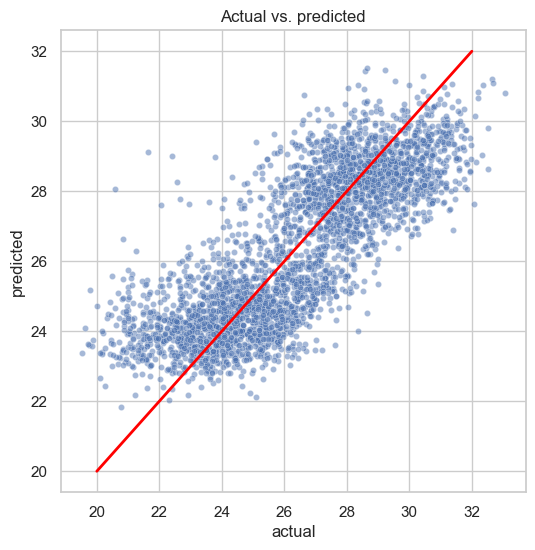

In [66]:
# Scatterplot to visualize predicted over actual
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([20,32], [20,32], c='red', linewidth=2)
plt.title('Actual vs. predicted');

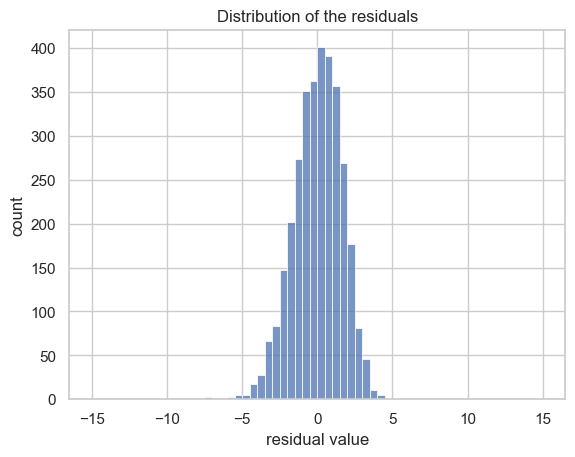

In [67]:
# Visualization of the distribution of the residuals
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

The residual graph shows the distribution of differences between targets and predictions. 
The residual graph forms a normal distribution; the estimates with residues near 0 have the highest frequency, though the highest frequency is not precisely on 0.

This fairly normally distributed graph validates the heteroscedasticity requisite to perform the linear regression.

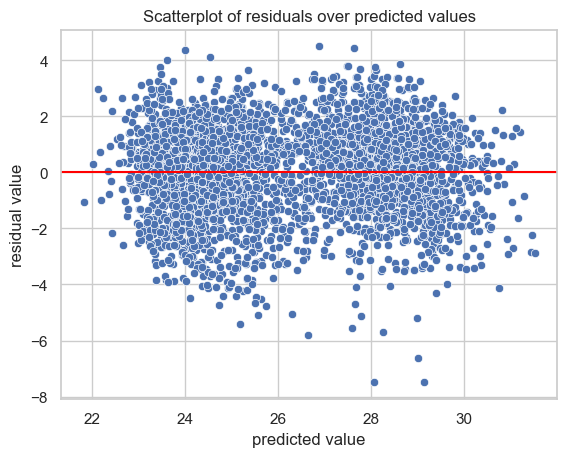

In [68]:
# Scatterplot of residuals over predicted

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

***Multicollinearity***

We check the multicollinearity using VIF (variance inflation factor).

In [69]:
# Estimation of the variance inflation factor.

# Importation of variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creation of a subset of the data with the continous independent variables. 
X = meteo_jacmel[['Air_pressure', 'Relative_Humidity', 'Wind_Direction', 'Wind_Speed']]

# Variance inflation factor for each variable estimation.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Creation of a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# VIF results.
df_vif

VIF
Air_pressure       77.414037
Relative_Humidity  83.222453
Wind_Direction     10.179259
Wind_Speed         10.045532

 =============================================================
 =============================================================

***MULTILINEAR REGRESSION***

We drop the Air pressure variable for this regression analysis.


In [70]:
X = meteo_jacmel[['Relative_Humidity', 'Wind_Direction', 'Wind_Speed']]
y = meteo_jacmel[['Air_Temperature']]

In [71]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [72]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[ 0.05752246  0.89276278 -0.41647338]
 [-0.09058875  0.77270633 -0.61434819]
 [-1.94587653 -1.14250956  0.23677479]
 ...
 [-0.52452861 -1.10351792  0.11800239]
 [-0.81987795 -1.19813494  1.8204859 ]
 [-0.61373833  0.03600866 -0.91127918]]


In [73]:
# Fit your model to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [74]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.5976010715332534
R^2: 0.5976010715332534
MAE: 1.390955720871197
MSE: 2.918351361748803
RMSE: 1.7083182846732055


In [75]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [76]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.6072762966016174
R^2: 0.6072762966016174
MAE: 1.3772401259011897
MSE: 2.8930110078110793
RMSE: 1.7008853599849343


Coefficient of determination suggests that 60.7% of the dependent variable is predicted by the independent variables.

In [77]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['Air_Temperature'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

actual  predicted  residual
13159  25.4083  25.516175 -0.107875
11823  26.1833  25.277648  0.905652
7079   28.3833  29.220415 -0.837115
15954  23.9000  23.614128  0.285872
2509   23.8667  23.456108  0.410592

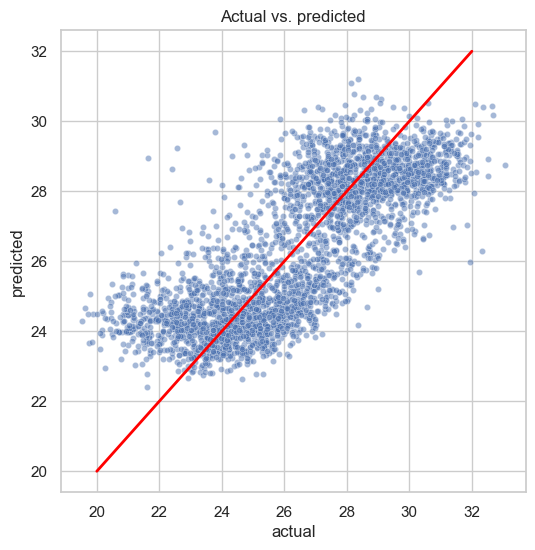

In [78]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([20,32], [20,32], c='red', linewidth=2)
plt.title('Actual vs. predicted');

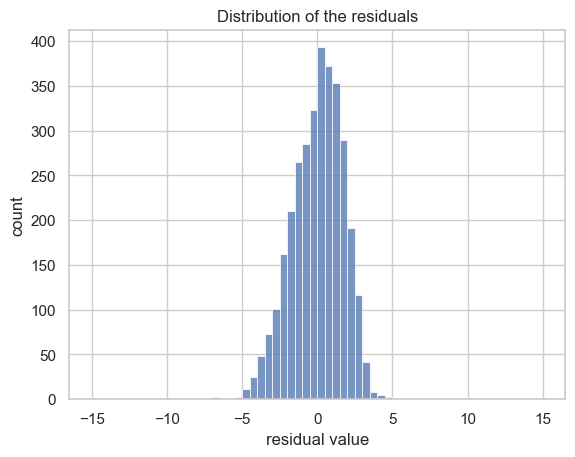

In [79]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

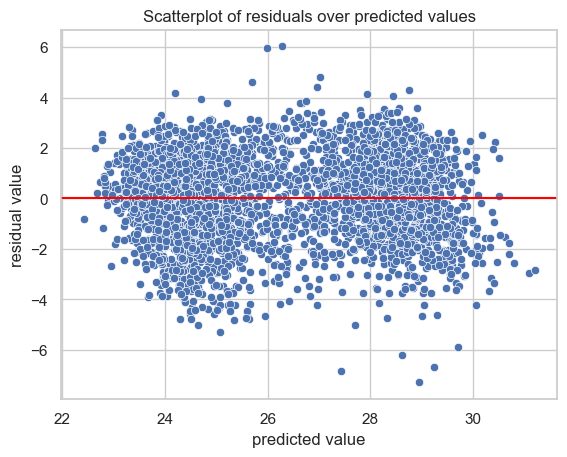

In [80]:
# Create a scatterplot of `residuals` over `predicted`

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

***Multicollinearity***

The variance inflation factor (VIF) was calculated for determining the multicollinearities. 

- If VIF=1, no intercorrelation exists between the independant variables; 

- If VIF stays within the range 1-5, the corresponding model is acceptable;

- If VIF > 10, the corresponding model is unstable (Famini et al, 1992)

In [81]:
# Estimation of the variance inflation factor.

# Importation of variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creation of a subset of the data with the continous independent variables. 
X = meteo_jacmel[['Relative_Humidity', 'Wind_Direction', 'Wind_Speed']]

# Variance inflation factor for each variable estimation.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Creation of a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# VIF results.
df_vif

VIF
Relative_Humidity  16.502371
Wind_Direction      8.987806
Wind_Speed          7.183414

In [82]:
lr.coef_

array([[-1.2666475 , -1.06805894, -0.28909328]])

In [83]:
lr.intercept_

array([26.36521263])

In [84]:
#display regression coefficients value of model
print(lr.intercept_, lr.coef_)

[26.36521263] [[-1.2666475  -1.06805894 -0.28909328]]


In [85]:
import statsmodels.api as sm

#define response variable
y = y_train

#define predictor variables
x = X_train_scaled

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Air_Temperature   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     6502.
Date:                Tue, 29 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:56:30   Log-Likelihood:                -25679.
No. Observations:               13139   AIC:                         5.137e+04
Df Residuals:                   13135   BIC:                         5.140e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.3652      0.015   1768.795      0.0

 =============================================================
 =============================================================

***Multiple linear regression***

We drop the wind speed variable for this regression analysis.


In [86]:
X = meteo_jacmel[['Relative_Humidity', 'Wind_Direction']]
y = meteo_jacmel[['Air_Temperature']]

In [87]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [88]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[ 0.05752246  0.89276278]
 [-0.09058875  0.77270633]
 [-1.94587653 -1.14250956]
 ...
 [-0.52452861 -1.10351792]
 [-0.81987795 -1.19813494]
 [-0.61373833  0.03600866]]


In [89]:
# Fit your model to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [90]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.5866485898905089
R^2: 0.5866485898905089
MAE: 1.4051221298634677
MSE: 2.9977829592394336
RMSE: 1.7314106847421942


In [91]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [92]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.5994751417805202
R^2: 0.5994751417805202
MAE: 1.3861204336345687
MSE: 2.950478450126825
RMSE: 1.7176956803016141


In [93]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['Air_Temperature'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

actual  predicted  residual
13159  25.4083  25.435718 -0.027418
11823  26.1833  25.477893  0.705407
7079   28.3833  29.333622 -0.950322
15954  23.9000  23.572685  0.327315
2509   23.8667  23.340139  0.526561

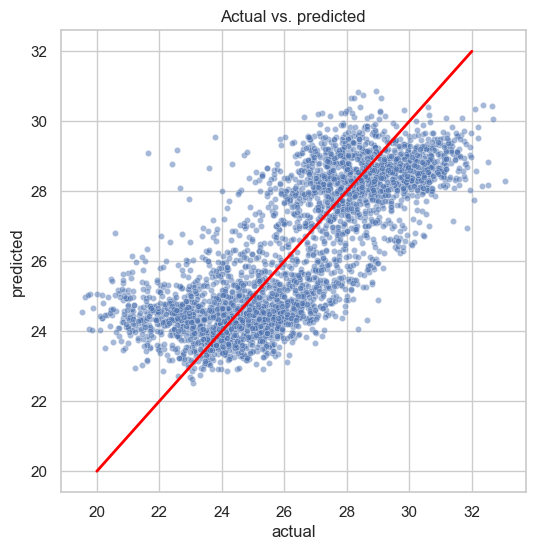

In [94]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([20,32], [20,32], c='red', linewidth=2)
plt.title('Actual vs. predicted');

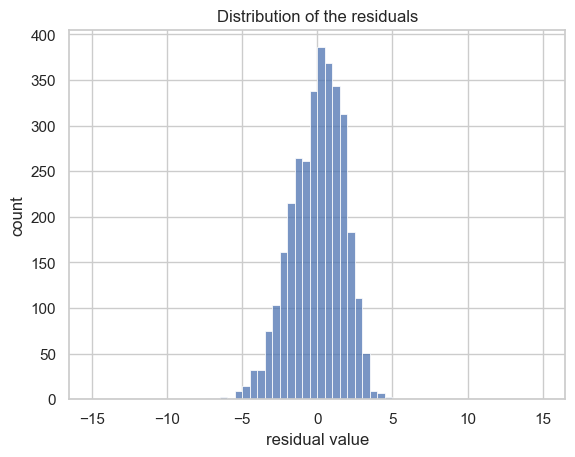

In [95]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

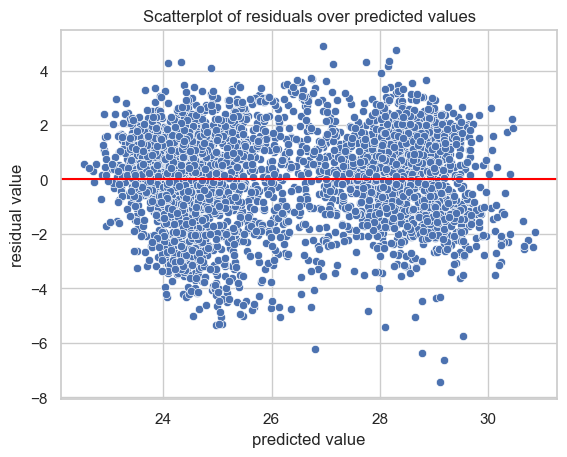

In [96]:
# Create a scatterplot of `residuals` over `predicted`

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

***Multicollinearity***

The variance inflation factor (VIF) was calculated for determining the multicollinearities. 

- If VIF=1, no intercorrelation exists between the independant variables; 

- If VIF stays within the range 1-5, the corresponding model is acceptable;

- If VIF > 10, the corresponding model is unstable (Famini et al, 1992)

In [97]:
# Estimation of the variance inflation factor.

# Importation of variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creation of a subset of the data with the continous independent variables. 
X = meteo_jacmel[['Relative_Humidity', 'Wind_Direction']]

# Variance inflation factor for each variable estimation.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Creation of a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# VIF results.
df_vif

VIF
Relative_Humidity  8.904696
Wind_Direction     8.904696

In [98]:
lr.coef_

array([[-1.18623191, -1.10511511]])

In [99]:
lr.intercept_

array([26.36521263])

In [100]:
#display regression coefficients value of model
print(lr.intercept_, lr.coef_)

[26.36521263] [[-1.18623191 -1.10511511]]


In [101]:
import statsmodels.api as sm

#define response variable
y = y_train

#define predictor variables
x = X_train_scaled

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Air_Temperature   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     9322.
Date:                Tue, 29 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:56:32   Log-Likelihood:                -25856.
No. Observations:               13139   AIC:                         5.172e+04
Df Residuals:                   13136   BIC:                         5.174e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.3652      0.015   1745.271      0.0